## Outline
- What is an API
- API Libraries
- REST API
    - Request and Reponse

In [2]:
# What is an API
import pandas as pd
dict_ = {'a': [11, 21, 31], 'b': [12, 22, 32]}
df = pd.DataFrame(dict_)
df.head()

,a,b
0,11,12
1,21,22
2,31,32


In [3]:
df

,a,b
0,11,12
1,21,22
2,31,32


In [4]:
df.mean()

a    21.0
b    22.0
dtype: float64

## REST APIs
### REpresentational State Transfer APIs

- REST APIs are used to interact with web services, 
    - i.e., Applications that you call through the internet
- They have a set of Rules regarding:
    1. Communication
    2. Input or Request
    3. Output or Reponse

In [5]:
!pip install nba_api
from nba_api.stats.static import teams
nba_teams = teams.get_teams()
nba_teams[:5]

     |████████████████████████████████| 225kB 436kB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


[{'abbreviation': 'ATL',
  'city': 'Atlanta',
  'full_name': 'Atlanta Hawks',
  'id': 1610612737,
  'nickname': 'Hawks',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'abbreviation': 'BOS',
  'city': 'Boston',
  'full_name': 'Boston Celtics',
  'id': 1610612738,
  'nickname': 'Celtics',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'abbreviation': 'CLE',
  'city': 'Cleveland',
  'full_name': 'Cleveland Cavaliers',
  'id': 1610612739,
  'nickname': 'Cavaliers',
  'state': 'Ohio',
  'year_founded': 1970},
 {'abbreviation': 'NOP',
  'city': 'New Orleans',
  'full_name': 'New Orleans Pelicans',
  'id': 1610612740,
  'nickname': 'Pelicans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'abbreviation': 'CHI',
  'city': 'Chicago',
  'full_name': 'Chicago Bulls',
  'id': 1610612741,
  'nickname': 'Bulls',
  'state': 'Illinois',
  'year_founded': 1966}]

In [7]:
def one_dict(list_dict):
    keys = list_dict[0].keys()
    out_dict = {key: [] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
        return out_dict
    
dict_nba_team = one_dict(nba_teams)
df_teams = pd.DataFrame(dict_nba_team)
df_teams.head()

,abbreviation,city,full_name,id,nickname,state,year_founded
0,ATL,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949


In [8]:
df_teams

,abbreviation,city,full_name,id,nickname,state,year_founded
0,ATL,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949


In [11]:
#df_warriors = df_teams[df_teams['nickname'] == 'Warriors']
#df_warriors
df_hawks = df_teams[df_teams['nickname'] == 'Hawks']
df_hawks

,abbreviation,city,full_name,id,nickname,state,year_founded
0,ATL,Atlanta,Atlanta Hawks,1610612737,Hawks,Atlanta,1949


In [13]:
id_hawks = df_hawks[['id']].values[0][0]
id_hawks

1610612737

In [15]:
from nba_api.stats.endpoints import leaguegamefinder
#gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable = id_warriors)
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable = id_hawks)
gamefinder

In [17]:
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612737,ATL,Atlanta Hawks,0021900957,2020-03-09,ATL vs. CHA,W,290,143,...,0.593,12,41,53,33,1.0,5,15,26,5.0
1,22019,1610612737,ATL,Atlanta Hawks,0021900943,2020-03-07,ATL @ MEM,L,240,101,...,0.857,14,32,46,23,9.0,2,14,24,-17.0
2,22019,1610612737,ATL,Atlanta Hawks,0021900930,2020-03-06,ATL @ WAS,L,239,112,...,0.667,6,30,36,25,9.0,4,17,25,-6.0
3,22019,1610612737,ATL,Atlanta Hawks,0021900905,2020-03-02,ATL vs. MEM,L,239,88,...,0.938,16,27,43,20,6.0,8,17,21,-39.0
4,22019,1610612737,ATL,Atlanta Hawks,0021900888,2020-02-29,ATL vs. POR,W,239,129,...,0.864,5,31,36,34,7.0,5,18,18,12.0


In [19]:
#games_home = games[games['MATCHUP'] == 'GSW vs. TOR']
games_home = games[games['MATCHUP'] == 'ATL vs. MEM']

In [20]:
#games_away = games[games['MATCHUP'] == 'GSW @ TOR']
games_away = games[games['MATCHUP'] == 'ATL @ MEM']

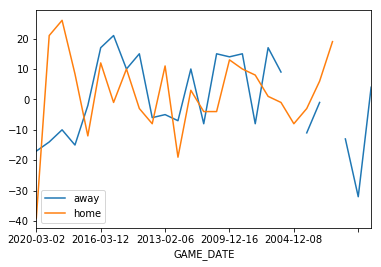

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
games_away.plot(x = 'GAME_DATE', y = 'PLUS_MINUS', ax = ax)
games_home.plot(x = 'GAME_DATE', y = 'PLUS_MINUS', ax = ax)
ax.legend(["away", "home"])
plt.show()